<a href="https://colab.research.google.com/github/szybcia2000/Minimalistic-particle-based-model-of-a-cloud-chamber/blob/main/wum_projekt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AUTOREM PROJEKTU JEST IGOR KUMELA 450116**
(nie wiem jak się na mimie podpisuje prace, mam nadzieję, że zrobiłem ok:))


---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2
from scipy.stats import spearmanr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px
from statsmodels.graphics.gofplots import ProbPlot
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import t
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import poisson
from scipy.stats import chisquare
from scipy.stats import kstest
from scipy.stats import f_oneway





file_name = 'dane_projekt1.csv'

df = pd.read_csv(file_name, delimiter=';')
df.tail()

,id,waga,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw
305,136,77.59,170.41,2,3,62,1124.12,415.07,0,3,289.83
306,13,72.39,163.27,1,1,61,701.51,44.23,0,2,282.16
307,309,81.61,173.70,1,2,63,9557.08,3844.10,1,3,-10668.84
308,173,77.24,175.21,2,1,60,1182.43,710.35,0,3,246.36
309,171,75.77,161.41,1,4,61,1258.84,663.98,0,3,276.53


**Zadanie 1**


1.   Jest 310 obserwacji (Bajtków, którzy odpowiedzieli na pytania). Badane zmienne: trzy jakościowe - płeć (kobieta albo mężczyzna), status gospodarstwa domowego (jedno- albo wieloosobowe) oraz miejsce zamieszkania (w kategoriach do 10000 mieszkańców, od 10000 do 100000 oraz powyżej 100000 mieszkańców). Pozostałe zmienne są ilościowe i dotyczą szeroko pojętej demografii. **Czy występują braki danych?** Wyrzucę wszystkie obserwacje, które mają ujemne wydatki na żywność. Poza tym, wyrzucę wszystkie obserwacje z NaNami.
2.   W tabeli "ilo" przedstawiono statystykę opisową dla zmiennych ilościowych. Zaprezenrowano także wykresy kołowe zmiennych jakościowych.
3. przedstawiono także histogramy dla zmiennych ilościowych. Wynika z nich, że użyte wcześniej odchylenie standardowe nie jest odpowiednią miarą zróżnicowania dla zmiennych dotyczących pieniędzy -  ich rozkłady nie są normalne. W przypadku zmiennych 'dochod' i 'oszczednosci' po zlogowaniu rozkład przypomina normalny, jednak nie stosuje się to do zmiennej 'wydatki_zyw'.



In [ ]:

df=df[df['wydatki_zyw']>0]

len(df)

304

In [ ]:
df.dropna()

iloDat={
    "obserwacja":["waga", "wzrost","dzieci","wiek","oszczednosci", "wydatki_zyw"],
    "wartość średnia": [np.mean(df["waga"]),np.mean(df["wzrost"]),np.mean(df["dzieci"]),np.mean(df["wiek"]), np.mean(df["oszczednosci"]), np.mean(df["wydatki_zyw"])],
    "mediana": [np.median(df["waga"]),np.median(df["wzrost"]),np.median(df["dzieci"]),np.median(df["wiek"]), np.median(df["oszczednosci"]), np.median(df["wydatki_zyw"])],
    "odchylenie standardowe": [np.std(df["waga"]),np.std(df["wzrost"]),np.std(df["dzieci"]),np.std(df["wiek"]), np.std(df["oszczednosci"]), np.std(df["wydatki_zyw"])]
       }
ilo=pd.DataFrame(iloDat)
ilo


,obserwacja,wartość średnia,mediana,odchylenie standardowe
0,waga,79.819309,79.895,3.298176
1,wzrost,172.805757,172.890,6.923826
2,dzieci,1.990132,2.000,1.338905
3,wiek,56.259868,56.500,6.771280
4,oszczednosci,887.975954,722.325,667.659009
5,wydatki_zyw,235.571151,250.465,57.138559


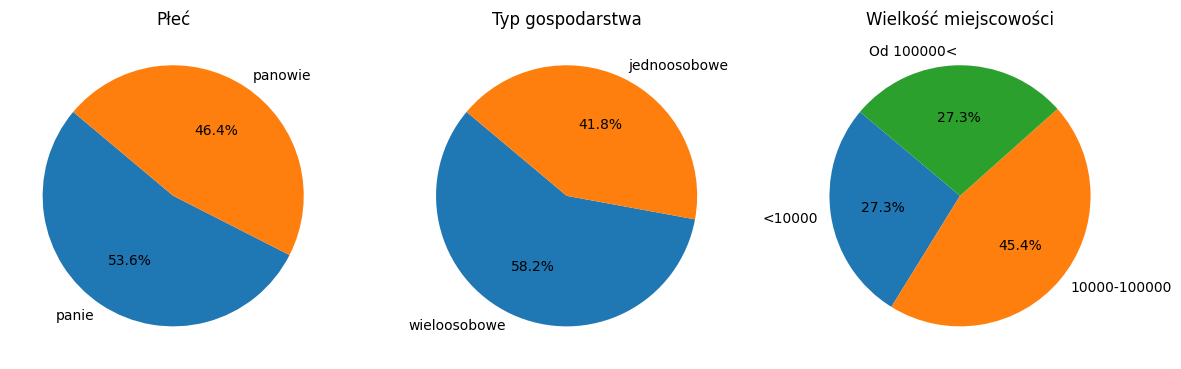

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

panowie=df[df["plec"]==2]
panie=df[df["plec"]==1]
paniPan=[panie.count()[0],panowie.count()[0]]
podpisyPaniPan=["panie","panowie"]

wieloos=df[df["jednoos"]==0]
jednoos=df[df["jednoos"]==1]
os=[wieloos.count()[0],jednoos.count()[0]]
podpisyOs=["wieloosobowe","jednoosobowe"]

do10=df[df["miejsce"]==1]
do100=df[df["miejsce"]==2]
od100=df[df["miejsce"]==3]
msce=[do10.count()[0],do100.count()[0],od100.count()[0]]
podpisyMsce=["<10000","10000-100000","Od 100000<"]



axs[0].pie(paniPan, labels=podpisyPaniPan, autopct='%1.1f%%', startangle=140, shadow=False)
axs[0].set_title('Płeć')

axs[1].pie(os, labels=podpisyOs, autopct='%1.1f%%', startangle=140, shadow=False)
axs[1].set_title('Typ gospodarstwa')

axs[2].pie(msce, labels=podpisyMsce, autopct='%1.1f%%', startangle=140, shadow=False)
axs[2].set_title('Wielkość miejscowości')

plt.tight_layout()
plt.show()


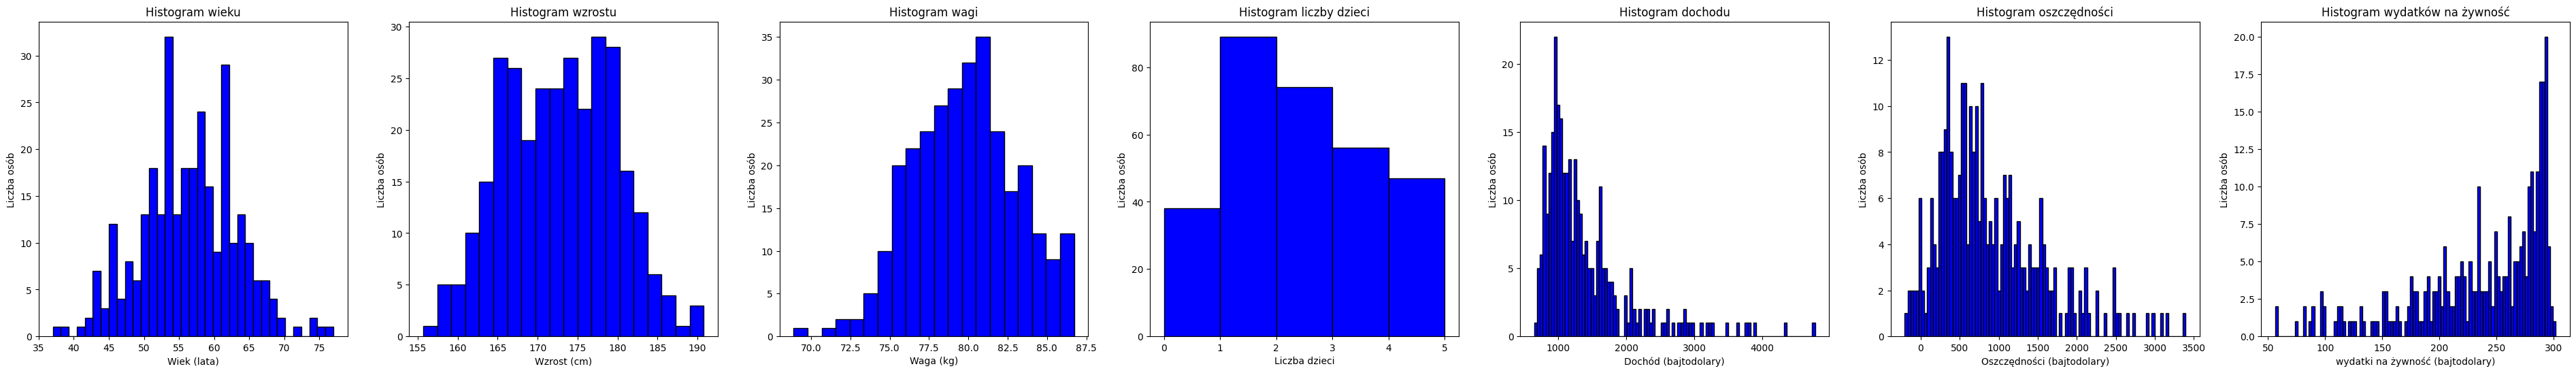

In [ ]:
fig, axs = plt.subplots(1, 7, figsize=(48, 6))

df['wiek'].plot(kind='hist', bins=df['wiek'].nunique(), color='blue', edgecolor='black', ax=axs[0])
axs[0].set_title('Histogram wieku')
axs[0].set_xlabel('Wiek (lata)')
axs[0].set_ylabel('Liczba osób')

df['wzrost'].plot(kind='hist', bins=20, color='blue', edgecolor='black', ax=axs[1])
axs[1].set_title('Histogram wzrostu')
axs[1].set_xlabel('Wzrost (cm)')
axs[1].set_ylabel('Liczba osób')

df['waga'].plot(kind='hist', bins=20, color='blue', edgecolor='black', ax=axs[2])
axs[2].set_title('Histogram wagi')
axs[2].set_xlabel('Waga (kg)')
axs[2].set_ylabel('Liczba osób')

df['dzieci'].plot(kind='hist', bins=5, color='blue', edgecolor='black', ax=axs[3])
axs[3].set_title('Histogram liczby dzieci')
axs[3].set_xlabel('Liczba dzieci')
axs[3].set_ylabel('Liczba osób')

df['dochod'].plot(kind='hist', bins=100, color='blue', edgecolor='black', ax=axs[4])
axs[4].set_title('Histogram dochodu')
axs[4].set_xlabel('Dochód (bajtodolary)')
axs[4].set_ylabel('Liczba osób')

df['oszczednosci'].plot(kind='hist', bins=100, color='blue', edgecolor='black', ax=axs[5])
axs[5].set_title('Histogram oszczędności')
axs[5].set_xlabel('Oszczędności (bajtodolary)')
axs[5].set_ylabel('Liczba osób')

df['wydatki_zyw'].plot(kind='hist', bins=100, color='blue', edgecolor='black', ax=axs[6])
axs[6].set_title('Histogram wydatków na żywność')
axs[6].set_xlabel('wydatki na żywność (bajtodolary)')
axs[6].set_ylabel('Liczba osób')

# Wyświetlenie wykresu
plt.show()

**Zadnie 2**

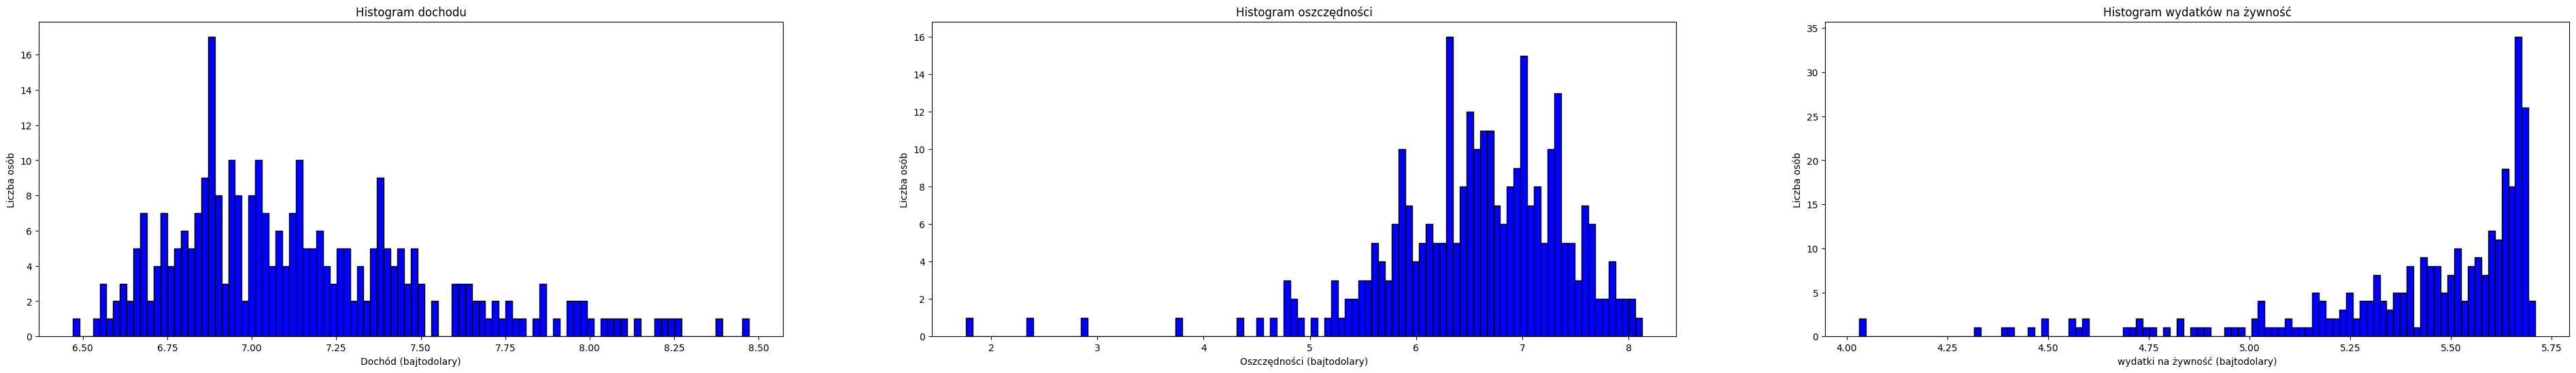

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(48, 6))


doKorel=df.copy()
doKorel['wydatki_zyw']=doKorel['wydatki_zyw'].apply(np.log)
doKorel['oszczednosci']=doKorel['oszczednosci'].apply(np.log)
doKorel['dochod']=doKorel['dochod'].apply(np.log)

doKorel['dochod'].plot(kind='hist', bins=100, color='blue', edgecolor='black', ax=axs[0])
axs[0].set_title('Histogram dochodu')
axs[0].set_xlabel('Dochód (bajtodolary)')
axs[0].set_ylabel('Liczba osób')

doKorel['oszczednosci'].plot(kind='hist', bins=100, color='blue', edgecolor='black', ax=axs[1])
axs[1].set_title('Histogram oszczędności')
axs[1].set_xlabel('Oszczędności (bajtodolary)')
axs[1].set_ylabel('Liczba osób')

doKorel['wydatki_zyw'].plot(kind='hist', bins=100, color='blue', edgecolor='black', ax=axs[2])
axs[2].set_title('Histogram wydatków na żywność')
axs[2].set_xlabel('wydatki na żywność (bajtodolary)')
axs[2].set_ylabel('Liczba osób')

plt.show()

**Rozważmy zmienne ilościowe:** Widzimy, że rozkłady nie wszystkich zmiennych są normalnej, a już tym bardziej nie ma między nimi liniowych zależności. Nie są spełnione założenia korelacji Pearsona, więc użyję korelacji Speatmana mimo, że zdaję sobie sprawę z tego, że w przypadku małych próbek może ona byc bardziej omylna.  


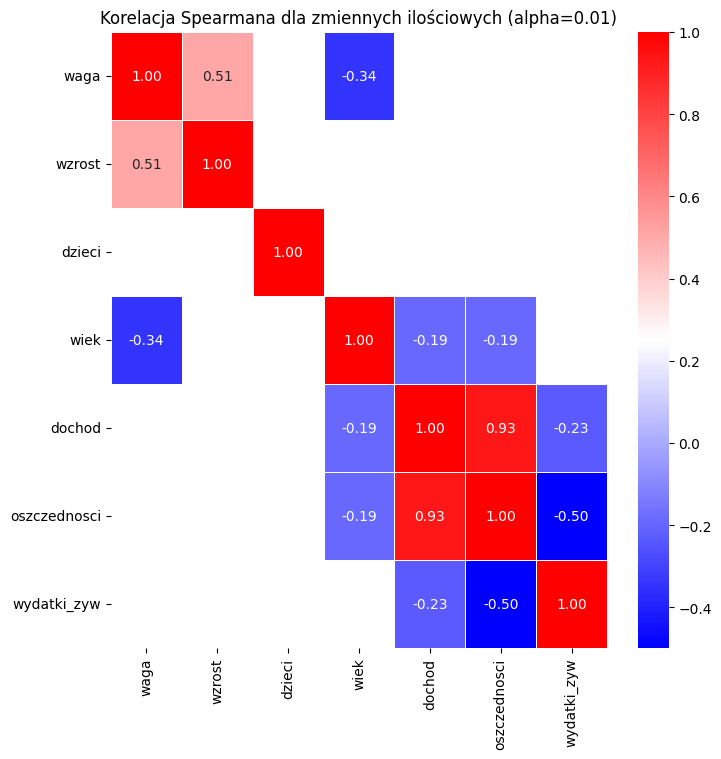

In [ ]:
doKorelOk=df[['waga','wzrost','dzieci','wiek','dochod','oszczednosci','wydatki_zyw']]
spearCorMat, pSpCor = spearmanr(doKorelOk)


spearCordf = pd.DataFrame(spearCorMat, index=doKorelOk.columns, columns=doKorelOk.columns)

# Pokażmy tylko te istotne statystycznie (alpha =0.01)
alpha = 0.01
pMask = pSpCor >= alpha

plt.figure(figsize=(8, 8))
sns.heatmap(spearCordf, annot=True, cmap='bwr', fmt=".2f", linewidths=.5, mask=pMask)


plt.title("Korelacja Spearmana dla zmiennych ilościowych (alpha=0.01)")

plt.show()

**Zadanie 3**

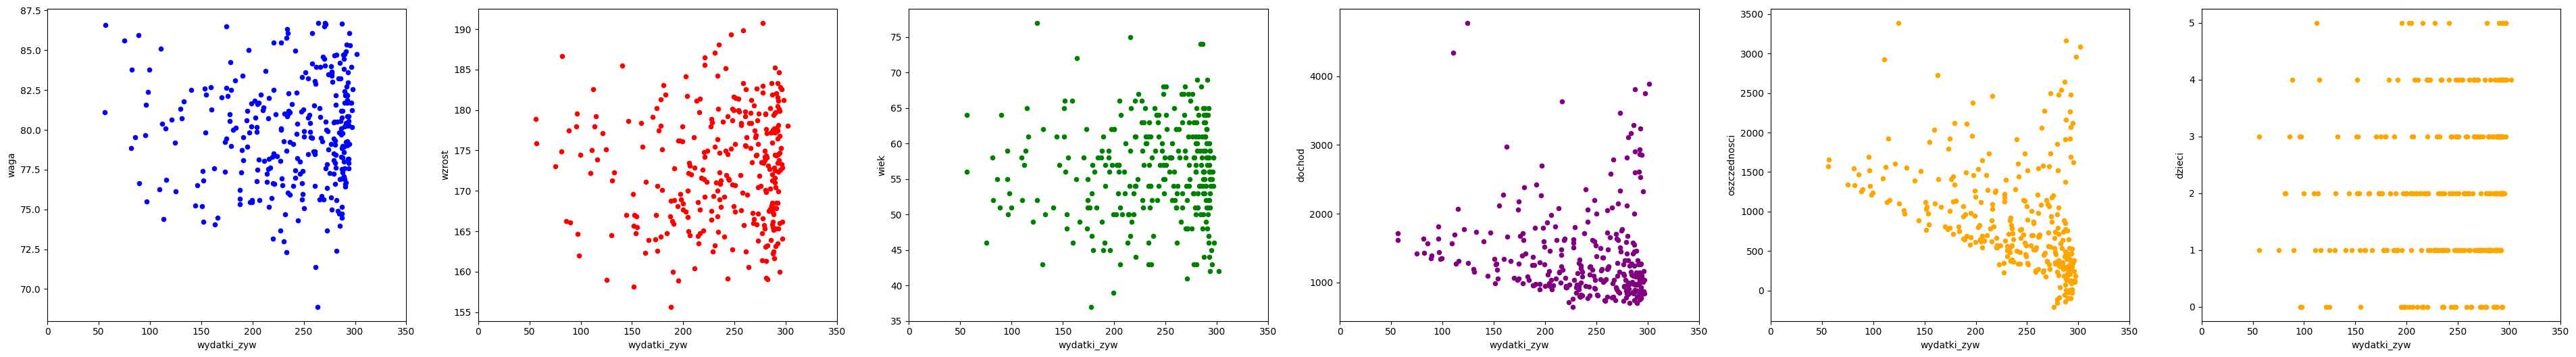

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(48, 6))

df.plot(kind='scatter', x='wydatki_zyw', y='waga', color='blue', ax=axs[0])
df.plot(kind='scatter', x='wydatki_zyw', y='wzrost', color='red', ax=axs[1])
df.plot(kind='scatter', x='wydatki_zyw', y='wiek', color='green', ax=axs[2])
df.plot(kind='scatter', x='wydatki_zyw', y='dochod', color='purple', ax=axs[3])
df.plot(kind='scatter', x='wydatki_zyw', y='oszczednosci', color='orange', ax=axs[4])
df.plot(kind='scatter', x='wydatki_zyw', y='dzieci', color='orange', ax=axs[5])

for ax in axs:
    ax.set_xlim(0, 350)


plt.show()

**Ad podpunkt 1:** scatter plot względem wydatków na żywność (x) dla wszystkich zmiennych ilościowych (y). Skupiono się tylko na dodatnich wydatkach za żywność i dodatnich oszczędnościach. Zależności wydają się nie przypominać żadnej formy funkcyjnej i nie mieć oczywistych zależności. Jedyne zależności, jakie jesteśmy w stanie wyekstrachować z tego wykresu to to, że być może więcej osób z dziećmy w liczbie 2,3,4 charakteryzuje się wysokimi wydatkami na żywność, aczkolwiek piszę to już po zrobieniu działającego modelu więc może jestem biased. Jakkolwiek ciekawe zależności, z którymi można pracować, widoczne są na zmiennych związanych z pieniędzmi.


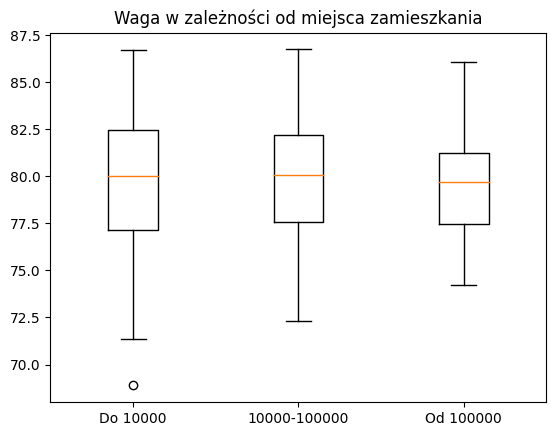

In [ ]:
wsie=df[df["miejsce"]==1]
miasteczka=df[df["miejsce"]==2]
miasta=df[df["miejsce"]==3]

doBoxplota=[wsie['waga'], miasteczka['waga'], miasta['waga']]
plt.boxplot(doBoxplota, labels=['Do 10000', '10000-100000', 'Od 100000'])
plt.title('Waga w zależności od miejsca zamieszkania')

plt.show()

**Ad podpunkt 2:** średnia waga nie zależy od miejsca zamieszkania, jednak jej miara zróżnicowania już tak. Z tego wykresu widać, że im większa 'klasa' liczby osób w miejscu zamieszkania, tym większe zróżnicowanie wyników. Może to wynikać z tego, że Bajtki w mieście prowadzą raczej taki sam, zrównoważony tryb życia, natomiast te ze wsi dzielą się na takie, które ciężko pracują i takie, które się lenią.

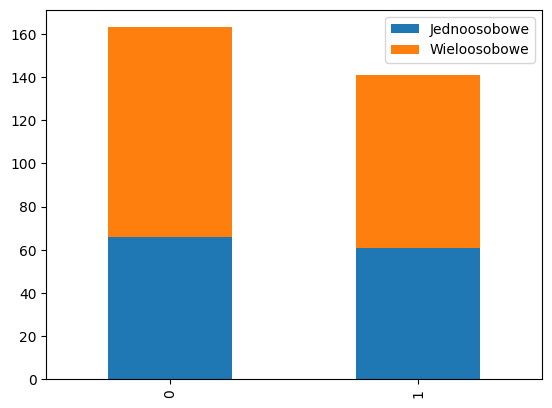

In [ ]:
panieJedno=panie[panie["jednoos"]==1]
panieWielo=panie[panie["jednoos"]==0]
panowieJedno=panowie[panowie["jednoos"]==1]
panowieWielo=panowie[panowie["jednoos"]==0]



daneStacked = {
    'Plec': ['Kobiety', 'Mezczyzni'],
    'Jednoosobowe': [panieJedno.count()[0], panowieJedno.count()[0]],
    'Wieloosobowe': [panieWielo.count()[0], panowieWielo.count()[0]]}

dfStacked=pd.DataFrame(daneStacked)

dfStacked.plot(kind='bar', stacked=True)
ax.legend().set_visible(False)
plt.show()




In [ ]:
dfStacked

,Plec,Jednoosobowe,Wieloosobowe
0,Kobiety,66,97
1,Mezczyzni,61,80


Na tym wykresie panie oznaczone są zerem, panowie jedynką. Na osi Y znajduje się liczba osób. Z tego wykresu wynika, że pań jest więcej i więcej z nich żyje w gospodarstwach wieloosobowych. Większy procent panów niż pań żyje w gospodarstwach jednoosobowych.

**Ad wykres dodatkowy:** postanowiłem stworzyć wykres przedstawiający ile kto ma dzieci w poszczególnych gospodarstwach

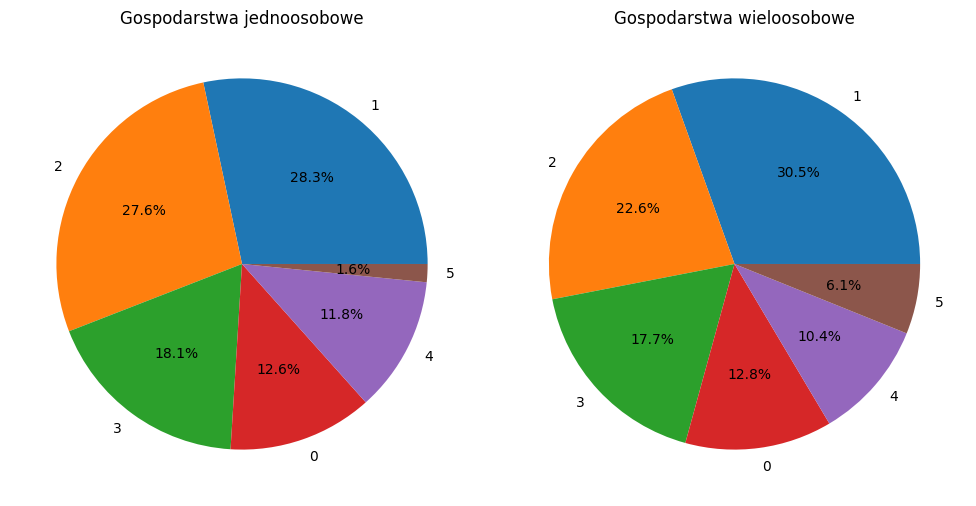

In [ ]:

dfJedno = df[df['jednoos'] == 1]
dfWielo = df[df['jednoos'] == 0]

zliczeniaJedno = dfJedno['dzieci'].value_counts()
zliczeniaWielo = dfWielo['dzieci'].value_counts()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(zliczeniaJedno, labels=zliczeniaJedno.index, autopct='%1.1f%%')
plt.title('Gospodarstwa jednoosobowe')

plt.subplot(1, 2, 2)
plt.pie(zliczeniaWielo, labels=zliczeniaWielo.index, autopct='%1.1f%%')
plt.title('Gospodarstwa wieloosobowe')

plt.tight_layout()
plt.show()

Najbardziej widoczna różnica dotyczy tego, że w badanej grupie Bajtków, niemal czterokrotnie częściej spotkamy piątkę dzieci w gospodarstwie wieloosobowym. Zakładam, że nie badano rodzin:)

**Zadanie 4**
Nie znamy odchylenia standardowego populacji. Wobec tego, do policzenia przedziałów ufności dla średniej skorzystam z rozkładu t studenta.

In [ ]:
t_value = t.ppf(1 - (1 -0.99) / 2, 290)

In [ ]:
len(df['wiek'])


stdWiek=np.std(df['wiek'])
swobWiek=len(df['wiek'])-1


print(f"średnia wieku: {np.mean(df['wiek'])}\nszukane przedziały ufności: {t_value*stdWiek/swobWiek}" )

średnia wieku: 56.11683848797251
szukane przedziały ufności: 0.06008561755439612


In [ ]:
len(df['wiek'])

291

len(df['wiek'])

Teraz pora na odchylenie standardowe. Użyję do tego rozkładu chi^2

In [ ]:
varWiek=np.var(df['wiek'])
critR = chi2.ppf(0.99 / 2, swobWiek)
critL = chi2.ppf(1-0.99/2, swobWiek)

### znajduję teraz przedziały ufności odchylenia standardowego
print(f"odchylenie standardowe to {stdWiek}\nprzedziały ufności odchylenia standardowego to {np.sqrt(varWiek*swobWiek/critR)} i {np.sqrt(varWiek*swobWiek/critL)}")


odchylenie standardowe to 6.771279905721986
przedziały ufności odchylenia standardowego to 6.782194385917671 i 6.775285433687792


**Ad podpunkt 2:**

**Zadanie 5**
Podzielono badaną próbkę osób na cztery grupy wedle centyli ich dochodów w sposób podany w treści zadania. w tym momencie też usuwam te obserwacje, które mają ujemne wydatki na żywność lub oszczędności.

---



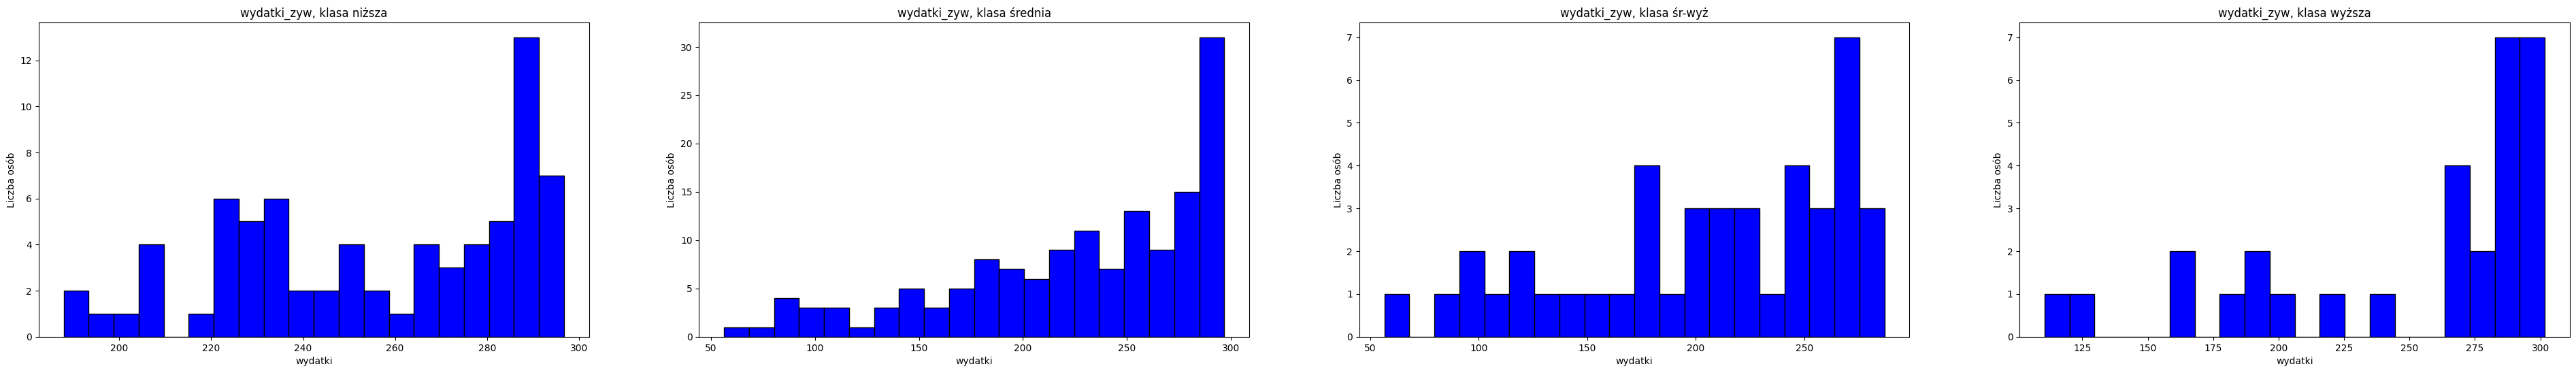

In [ ]:
df=df[df['wydatki_zyw']>0]
df=df[df['oszczednosci']>0]

kw0=df["dochod"].quantile(0)
kw25=df["dochod"].quantile(0.25)
kw75=df["dochod"].quantile(0.75)
kw90=df["dochod"].quantile(0.9)

niz=df[df["dochod"]<kw25]
sr=df[(df["dochod"]>=kw25)&(df["dochod"]<kw75)]
wyzSr=df[(df["dochod"]>=kw75)&(df["dochod"]<kw90)]
wyz=df[df["dochod"]>=kw90]

np.std(niz['wydatki_zyw'])

fig, axs = plt.subplots(1, 4, figsize=(48, 6))

niz['wydatki_zyw'].plot(kind='hist', bins=20, color='blue', edgecolor='black', ax=axs[0])
axs[0].set_title('wydatki_zyw, klasa niższa')
axs[0].set_xlabel('wydatki')
axs[0].set_ylabel('Liczba osób')

sr['wydatki_zyw'].plot(kind='hist', bins=20, color='blue', edgecolor='black', ax=axs[1])
axs[1].set_title('wydatki_zyw, klasa średnia')
axs[1].set_xlabel('wydatki')
axs[1].set_ylabel('Liczba osób')

wyzSr['wydatki_zyw'].plot(kind='hist', bins=20, color='blue', edgecolor='black', ax=axs[2])
axs[2].set_title('wydatki_zyw, klasa śr-wyż')
axs[2].set_xlabel('wydatki')
axs[2].set_ylabel('Liczba osób')



wyz['wydatki_zyw'].plot(kind='hist', bins=20, color='blue', edgecolor='black', ax=axs[3])
axs[3].set_title('wydatki_zyw, klasa wyższa')
axs[3].set_xlabel('wydatki')
axs[3].set_ylabel('Liczba osób')

plt.show()



Zauważam, że dane nie są normalne, w danych nie ma jakichś "szalonych" outlayerów, wobec tego na miarę zróżnicowania wybieram zakes, czyli różnica między największą a najmniejszą wartością w zbiorze. Poprawnym byłoby także użycie miary IQR, dla każdego histogramu z osobna. Jest to częsta taktyka przy rozkładach skośnych, a z takie przypominającymi mamy tu do czynienia. Bardziej intuicyjne są dla mnie jednak zakresy, dlatego z nich skorzystam.

In [ ]:
print(f"średnia dla niższej: {np.mean(niz['wydatki_zyw'])},zakes dla niższej: {niz['wydatki_zyw'].max()-niz['wydatki_zyw'].min()}")
print(f"średnia dla średniej: {np.mean(sr['wydatki_zyw'])}, zakes dla średniej: {sr['wydatki_zyw'].max()-sr['wydatki_zyw'].min()}")
print(f"średnia dla śr-wyższej: {np.mean(wyzSr['wydatki_zyw'])}, zakes dla wyższej: {wyzSr['wydatki_zyw'].max()-wyzSr['wydatki_zyw'].min()}")
print(f"średnia dla wyższej: {np.mean(wyz['wydatki_zyw'])}, zakes dla wyższej: {wyz['wydatki_zyw'].max()-wyz['wydatki_zyw'].min()}")



średnia dla niższej: 255.56931506849318,zakes dla niższej: 108.81000000000003
średnia dla średniej: 226.87896551724137, zakes dla średniej: 240.53
średnia dla śr-wyższej: 205.42162790697677, zakes dla wyższej: 230.46
średnia dla wyższej: 249.926, zakes dla wyższej: 191.09


Co ciekawe, nie ma jasno widocznej zależności między klasą, a wydatkami na żywność. Zakresy, bo taką miarę zróżnicowania znałem za stosowną, również nie są większe w wyższych klasach. Najwyższe zróżnicowanie jest w klasie średniej, najniższe natomiastw  niższej. Ten wynik może być wskazówką, że wprowadzenie do modelu przewidującego wydatki na żywność dodatkowej zmiennej odpowiadającej klasie może nie być poprawnym podejściem do tematu.

**Zadanie 6**


**Ad podpunkt 1:** policzmy wariancję oszczędności pań i panów.

wariancja panów:403906.3103780092, wariancja pań:481476.8002419888



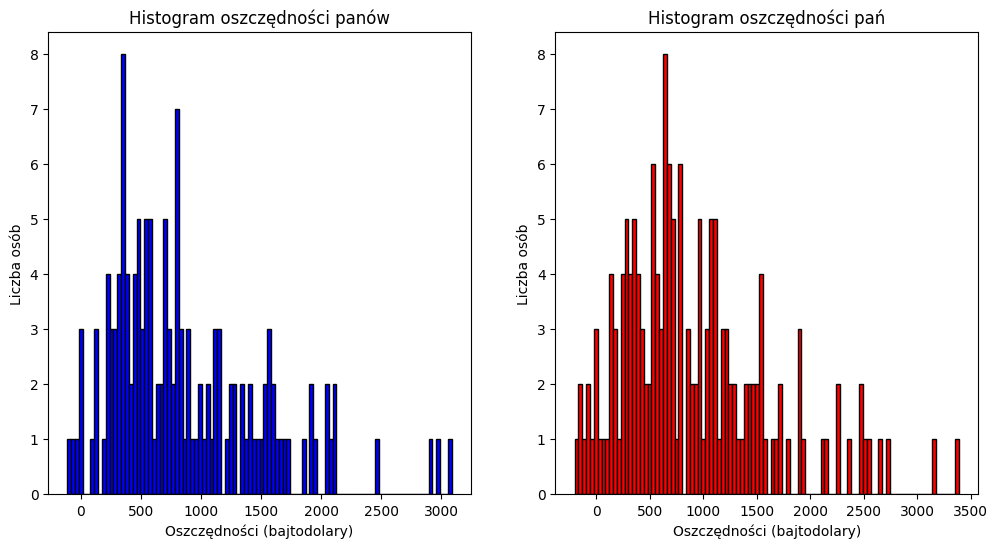

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

panowie['oszczednosci'].plot(kind='hist', bins=100, color='blue', edgecolor='black',ax=axs[0])
axs[0].set_title('Histogram oszczędności panów')
axs[0].set_xlabel('Oszczędności (bajtodolary)')
axs[0].set_ylabel('Liczba osób')


panie['oszczednosci'].plot(kind='hist', bins=100, color='red', edgecolor='black',ax=axs[1])
axs[1].set_title('Histogram oszczędności pań')
axs[1].set_xlabel('Oszczędności (bajtodolary)')
axs[1].set_ylabel('Liczba osób')


print(f"wariancja panów:{np.var(panowie['oszczednosci'])}, wariancja pań:{np.var(panie['oszczednosci'])}\n")

moze umiemy poprawić te rozkłady żeby bardziej przypominały normalny i żeby miały mniejszą wariancję

wariancja panów:0.7386460743371605, wariancja pań:0.7719878107119696



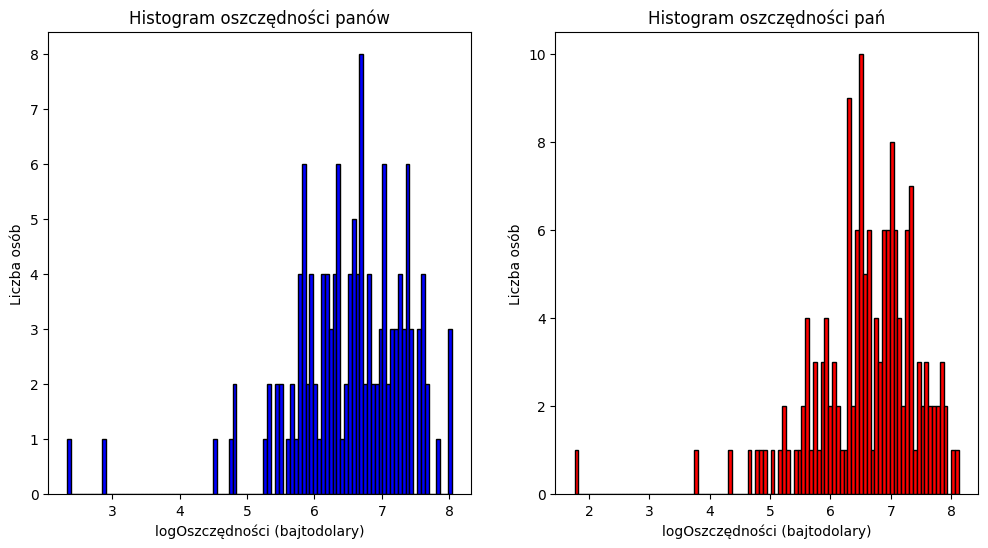

In [ ]:
logPanowieOsz=panowie['oszczednosci'].apply(lambda x: np.log(x))
logPanieOsz=panie['oszczednosci'].apply(lambda x: np.log(x))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

logPanowieOsz.plot(kind='hist', bins=100, color='blue', edgecolor='black',ax=axs[0])
axs[0].set_title('Histogram oszczędności panów')
axs[0].set_xlabel('logOszczędności (bajtodolary)')
axs[0].set_ylabel('Liczba osób')


logPanieOsz.plot(kind='hist', bins=100, color='red', edgecolor='black',ax=axs[1])
axs[1].set_title('Histogram oszczędności pań')
axs[1].set_xlabel('logOszczędności (bajtodolary)')
axs[1].set_ylabel('Liczba osób')


print(f"wariancja panów:{np.var(logPanowieOsz)}, wariancja pań:{np.var(logPanieOsz)}\n")

Rozkłady bardziej przypominają rozkład normalny, a wariancje są do siebie zbliżone. Wobec tego, zastosuję test t-studenta żeby odpowiedzieć na pytanie "czy kobiety cechują się wyższymi wartościami oszczędności niż mężczyzni?". Wyrzuciłem też wiersze, które zawierają w sobie NaN.(te wiersze wynikają z ujemnych oszczędności, na dalszym etapie pracy i tak wyrzucam takie wartości.) Ustalmy hipotezę zerową taką, że średnie oszczędności są równe w grupach Bajtów obu płci.



In [ ]:
ist=0.01
t_statistic, p_value = stats.ttest_ind(logPanieOsz.dropna(), logPanowieOsz.dropna())

print("Wartość t_stat:", t_statistic)
print("p wartość:", p_value)


if p_value < ist:
    print("Hipoteza zerowa nieokej.")
else:
    print("Hipoteza zerowa, że osczędności równe w obu płciach okej, nie ma podstaw, żeby ją odrzucić. Czyli wcale kobiety nie mają większych oszczędności")

Wartość t_stat: 0.5977532186270779
p wartość: 0.5504727087406563
Hipoteza zerowa, że osczędności równe w obu płciach okej, nie ma podstaw, żeby ją odrzucić. Czyli wcale kobiety nie mają większych oszczędności


**Ad podpunkt 2:**

Text(0, 0.5, 'Liczba osób')

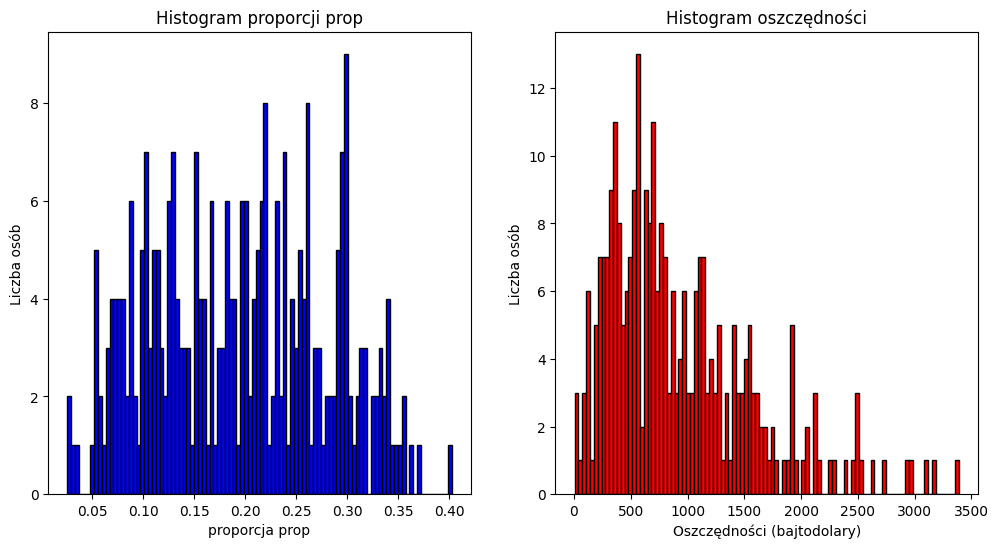

In [ ]:
###prop - proporcja zyw/dochod
df=df[df['wydatki_zyw']>=0]

prop=df['wydatki_zyw']/df['dochod']
df["prop"]=prop

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

df["prop"].plot(kind='hist', bins=100, color='blue', edgecolor='black',ax=axs[0])
axs[0].set_title('Histogram proporcji prop')
axs[0].set_xlabel('proporcja prop')
axs[0].set_ylabel('Liczba osób')


df["oszczednosci"].plot(kind='hist', bins=100, color='red', edgecolor='black',ax=axs[1])
axs[1].set_title('Histogram oszczędności')
axs[1].set_xlabel('Oszczędności (bajtodolary)')
axs[1].set_ylabel('Liczba osób')

###df.plot(kind='scatter', x='prop', y='oszczednosci', color='orange')


Chciałem sprawić, żeby rozkład prop był normalny, aby użyć testu chi^2 (logarytmowanie nie działa). Nie wyszło, zatem odwołam się do testu Spearmana, który nie wymaga normalności zmiennych. Hipoteza zerowa - niższa proporcja wydatków na żywność względem dochodu jest skorelowana z wyższymi oszczędnościami.




In [ ]:
###dane posortowane po proporcji, aby spełniało założenia testu Spearmana
df = df.sort_values(by='prop').reset_index(drop=True)
spearcor, p_spear = spearmanr(df['prop'], df['oszczednosci'])

print("Korelacja Spearmana:", spearcor)
print("P-wartość:", p_spear)


Korelacja Spearmana: -0.969392595045508
P-wartość: 2.6149786542665987e-178


Wobec tego nie ma podstaw żeby odrzucić, że, niższa proporcja wydatków na żywność względem dochodu jest skorelowana z wyższymi oszczędnościami.

**Ad podpunkt 3:** Pytanie jest o próbkę, więc mogę z całkowitą pewnością odpowiedzieć na to pytanie. (ustaliliśmy na ćwiczeniach że można tak zrobić, jeżeli dobrze zrozumiałem)

In [ ]:
print(f"Tak, średnia waga kobiet w próbie jest wyższa niż 56kg i wynosi {np.mean(panie['waga'])}")

Tak, średnia waga kobiet w próbie jest wyższa niż 56kg i wynosi 78.01662576687117


**Ad podpunkt 4:** Postawię hipotezę dotyczącą tstudentowości rozkładu wagi wśród Panów. Dopasuję do danych rozkład tStudenta a następnie sprawdzę za pomocą testu Shapiro-Wilka czy było to zasadne. Zdecydowałem się na użycie tego testu, ponieważ dla większych próbek rozkład tStudenta przypomina rozkład Gaussa i jest to stosowana metoda na tym kursie. Istotność statystyczną przyjmuję na 0.01

In [ ]:
wagaPanowie = df['waga']


doFitu = t.fit(wagaPanowie)

shap, shapP = shapiro(wagaPanowie)

# Wyświetl wyniki testu
print(f"statystka SW {shap},p wartość: {shapP}")



if shapP > 0.01:
    print(f"Nie ma podstaw do odrzucenia hipotezy zerowej, że dane są zgodne z rozkładem tStudenta o parametrach {doFitu}")
else:
    print("Są podstawy do odrzucenia hipotezy zerowej, że dane są zgodne z rozkładem tStudenta o parametrach {doFitu}")

statystka SW 0.9927161931991577,p wartość: 0.166848823428154
Nie ma podstaw do odrzucenia hipotezy zerowej, że dane są zgodne z rozkładem tStudenta o parametrach (35827.01333775111, 79.86210375355813, 3.321812535024148)


**Zadanie 7**

**Ad podpunkt 1:**

'Dummiesuję' zmienne jakościowe.

In [ ]:
dfModel=df.copy()
plec_col=pd.get_dummies(dfModel['plec'], prefix='plec', drop_first=True, dtype=int)
jedno_col=pd.get_dummies(dfModel['jednoos'], prefix='jednoos', drop_first=True, dtype=int)
miejsce_col=pd.get_dummies(dfModel['miejsce'], prefix='miejsce', drop_first=True, dtype=int)
dfModel=pd.concat([dfModel,plec_col, jedno_col, miejsce_col], axis=1)
dfModel=dfModel.drop(['plec','jednoos','miejsce','prop'],axis=1)

In [ ]:
dfModel

,id,waga,wzrost,dzieci,wiek,dochod,oszczednosci,wydatki_zyw,plec_2,jednoos_1,miejsce_2,miejsce_3
0,303,85.08,175.06,1,52,4339.20,2921.25,110.60,1,1,1,0
1,304,79.18,175.14,1,52,4780.15,3390.59,124.69,0,1,1,0
2,259,86.57,175.83,1,64,1712.88,1659.56,56.52,1,1,1,0
3,236,81.10,178.87,3,56,1617.44,1569.45,56.27,1,1,1,0
4,245,78.87,174.87,2,58,1635.88,1543.43,81.32,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
286,33,84.17,183.32,2,65,731.45,233.47,258.42,1,0,0,0
287,46,80.17,166.13,5,58,836.55,126.50,296.73,0,0,1,0
288,28,79.26,165.97,3,64,741.25,181.03,268.28,0,0,1,0
289,4,80.84,179.87,2,56,793.26,17.62,293.88,1,0,0,1


In [ ]:
X=dfModel.drop(['id','wydatki_zyw'],axis=1)
X=sm.add_constant(X)
y=dfModel['wydatki_zyw']

model = sm.OLS(y, X).fit()
print(model.summary(alpha=0.01))

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     63.47
Date:                Sun, 12 May 2024   Prob (F-statistic):           4.25e-66
Time:                        21:26:19   Log-Likelihood:                -1418.9
No. Observations:                 291   AIC:                             2860.
Df Residuals:                     280   BIC:                             2900.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.005      0.995]
--------------------------------------------------------------------------------
const          208.1718     91.817      2.267   

**Ad podpunkt 2:**


**R^2** wynosi około 0.68, oznacza to, że wstępny model w miarę objaśnia zmienną zależną, jednak będę próbował poprawić tę statystykę.
**Test łącznej istotności** - p wartość statystyki F jest mniejsza niż poziom przyjętej przez nas istotności statystycznej, więc co najmniej jedna zmienna niezależna ma wpływ na wydatki na żywność.
**Testy indywidaulnej istotności** - na podstawie analizy kolumy P>t stwierdzam, że istotne w modelu są wyłącznie zmienne niezależne "dochod", "oszczędności" i stosunkowo mało brakuje do istotności "dzieci".





**Ad podpunkt 3** Liniowość formy funkcyjnej:

Ramsey RESET Test, czyli test resetowania Ramseya, jest narzędziem służącym do sprawdzania poprawności specyfikacji modelu regresji. Test ten polega na ponownym oszacowaniu modelu z dodatkowymi wyrazami, które są kwadratami, kubicznymi lub innymi przekształceniami zmiennych niezależnych, a następnie testuje, czy nowo utworzone wyrazy są istotne statystycznie. Jeśli tak, sugeruje to, że pierwotny model może być niewłaściwie określony.

In [ ]:
# Results of RESET test
print(sm.stats.diagnostic.linear_reset(model, test_type='fitted'))

<Wald test (chi2): statistic=589.1829406840507, p-value=1.1496086282745328e-128, df_denom=2>


p wartość testu Ramseya jest mniejsza niż poziom istotności statystycznej, zatem odrzucam hipotezę zerową, że forma funkcyjna modelu jest określona poprawnie.

Teraz wykonam taki wykres, że na osi x są wyniki mojego fitu, natomiast na osi y residualsy. Jeżeli założenia modelu regresji liniowej są spełnione, wartości
powinny być w chmurce bez trendu, a dane powinny być równo zdystrubuowane wokół linii horyzontalnej.


In [ ]:
summary_framee = model.get_prediction().summary_frame()
print("summary_frame:")
print(summary_framee)
print()

fity = summary_framee['mean']
res = y - fity
###print("residuals:")
###print(res)


px.scatter(x=fity, y=res,
           title='Residual vs fitted value').add_scatter(x=[min(fity),
                                                            max(fity)],
                                                         y=[0,0]).show()

summary_frame:
           mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0    363.490184  11.596763     340.662275     386.318092    295.867837   
1    344.175333  13.014082     318.557470     369.793196    275.560879   
2    118.735199   8.122058     102.747152     134.723247     53.105282   
3    134.921382   5.711931     123.677603     146.165161     70.283229   
4    138.055625   5.740270     126.756062     149.355188     73.407744   
..          ...        ...            ...            ...           ...   
286  250.210015   6.370615     237.669635     262.750396    185.333753   
287  303.447741   6.803015     290.056194     316.839288    238.401589   
288  261.967781   5.034000     252.058489     271.877072    197.548355   
289  317.744203   5.232098     307.444962     328.043444    253.263643   
290  283.754404   6.340056     271.274179     296.234630    218.889743   

     obs_ci_upper  
0      431.112530  
1      412.789786  
2      184.365116  
3      199.55953

Wynik jest niesatysfakcjonujący, więc założenia modelu nie są spełnione.

**Założenie normalnej dystrybucji residuuów:** Wykonam wykres qq i histogram.

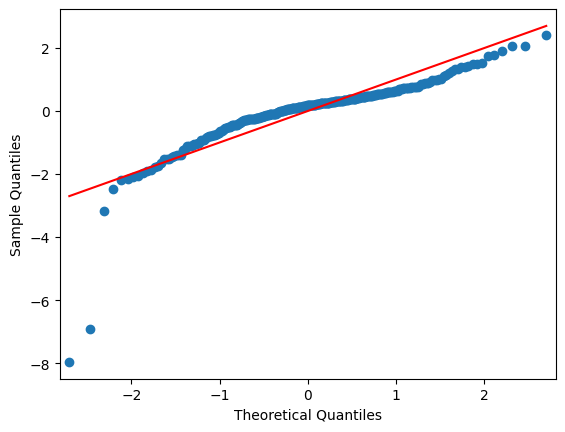

In [ ]:
resStand = (res - res.mean())/res.std()
resSqrt = np.sqrt(np.abs(resStand)) ###przyda się później


qqplot_data = qqplot(resStand, line='s').gca().lines

In [ ]:
px.histogram(x=resStand, title='Residuals').show()

To dodatkowe założenie również wydaje się nie być do końca spełnione, jednak wykonam test statystyczny Shapiro-Wilka na normalność rozkładu.

In [ ]:
shapiro, shapiroP = stats.shapiro(resStand)
print(f"Statystyka Shapiro-Wilka: {shapiro}, p wartość:  {shapiroP}")


Statystyka Shapiro-Wilka: 0.7807501554489136, p wartość:  1.8322875163722702e-19


Wobec tego dane nie są normalne, czyli nie mamy normalnej dystrybucji residuuów.

**Autokorelacja składnika losowego:** Do zbadania autokorelacji składnika losowego zdecydowałem sie użyć testu Durbin-Watsona. Gdy jego wartość będzie bliska 2 - brak autokorelacji. Bliska 0 - dodatnia autokorelacja. Bliska 4 - ujemna.

In [ ]:
durWat = sm.stats.stattools.durbin_watson(model.resid)
print("Statystyka Durbin-Watsona:", durWat)



Statystyka Durbin-Watsona: 0.8612568715799445


Mamy zatem dodatnią autokorelację składnika losowego.

**Homoskedatyczność:** Wykonam wykres scale vs location (resStd vs fit). Jeżeli będzie on chmurą, mamy homoeskadyczność. Jeżeli rozrzut wartości będzie zależał od fitu, mamy do czynienia z heteroskedatycznością.

In [ ]:
px.scatter(x=fity, y=resSqrt, title='Scale vs location').show()

Rozrzut zależy od wartości x, na pewno mamy heteroskadetyczność, jednak łatwiej jest przeanalizować wykres typu linia:

In [ ]:
linia = px.line(res)
linia.add_hline(y=0)

Mamy okresy wysokiej i niskiej fluktuacji amplitudy. Wskazuje to na niestabilną wartiancję - heteroskedatywność. Można dostrzec trend rosnący na początku (od 0 do 50), a nastęspnie malejący. Wskazuje to na autokorelację.

**Ad podpunkt 4** - niedokładna współliniowość (multicolinearity)

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

         feature          VIF
0          const  2346.212008
1           waga     1.746297
2         wzrost     2.293941
3         dzieci     1.028407
4           wiek     1.211731
5         dochod     9.940274
6   oszczednosci    12.232119
7         plec_2     2.691365
8      jednoos_1     2.387842
9      miejsce_2     1.504873
10     miejsce_3     1.518265


Na podstawie współczynników VIF, wnioskuję, że zmienne "oszczędności" i "dochód" są dotknięte tą kwestią. Przyjmuje się, że VIF zbliżone do 10 oznacza multicolinearity.

**Ad podpunkt 5:** Sprawdźmy, czy są obserwacje odstające.

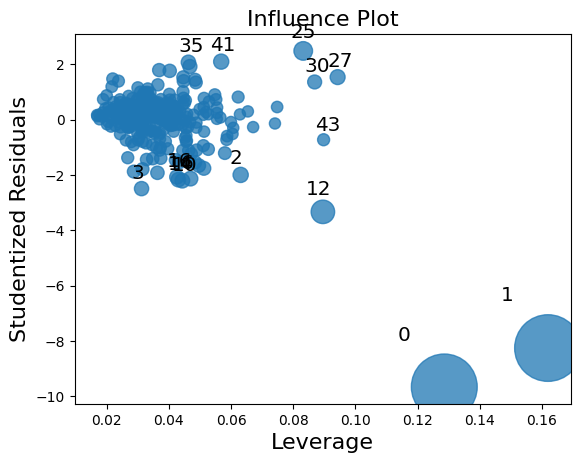

In [ ]:
sm.graphics.influence_plot(model, criterion="cooks").show()

Zdecydowałbym się na usunięcie obserwacji 0 i 1 ze względu na fakt, że mają one wysokie wartości dźwigni przy dużych wartościach residualnych.

**Ad podpunkt 6:**

Wprowadźmy dataframe dfT, który będzie nam służył w naszym najlepszym modelu. Wyrzucam wszystkie obserwacje, które mają wydatki na żywność mniejsze niż zero, bo wydaje mi się to niefizyczne.

In [ ]:
dfT = pd.read_csv(file_name, delimiter=';')
dfT=dfT[dfT['wydatki_zyw']>0]
dfT=dfT[dfT['oszczednosci']>0]

Spostrzeżenie jest następujące - w poprzednim modelu nie mieliśmy odpowiedniej formy funkcyjnej, więc chcemy znaleźć takie zmienne, które pozwolą nam dobrze opisać wydatki na żywność w ramach modelu liniowego. Wprowadźmy sensownie wyglądającą kolumnę 'roz', która opisuje różnicę między dochodami i oszczędnościami każdego Bajtka, i spójrzmy na następujące scatter-ploty:

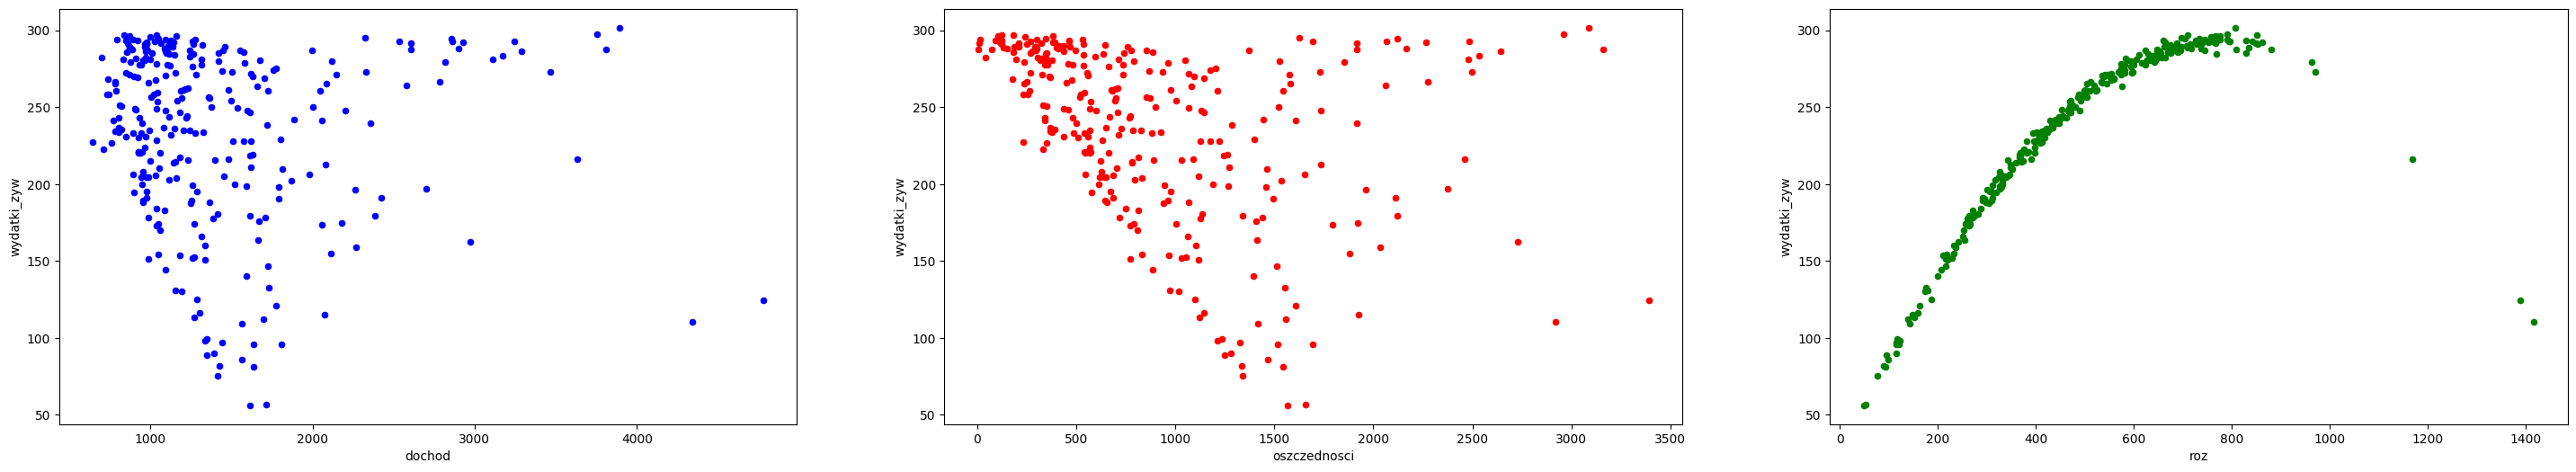

In [ ]:
dfT['roz']=dfT['dochod']-dfT['oszczednosci']

fig, axs = plt.subplots(1, 3, figsize=(36, 6))

dfT.plot(kind='scatter', x='dochod', y='wydatki_zyw', color='blue', ax=axs[0])
dfT.plot(kind='scatter', x='oszczednosci', y='wydatki_zyw', color='red', ax=axs[1])
dfT.plot(kind='scatter', x='roz', y='wydatki_zyw', color='green', ax=axs[2])



plt.show()

*Różnica* między dochodem a zarobkami daje kwadratową relacje w kontekście wydatków na żywność. Zatem nasza forma funkcyjna będzie zawierała zmienną roz i roz^2. Zauważmy też, że dzieci były jedyną (oprócz dochodów i oszczędności) zmienną, która we wstępnym modelu miała p wartość zbliżoną do wybranego poziomu istotności statystycznej. **Wobec tego wybieram do mojego modelu zmienne roz, roz^2 i dzieci**

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.468e+04
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        21:26:06   Log-Likelihood:                -691.01
No. Observations:                 291   AIC:                             1392.
Df Residuals:                     286   BIC:                             1410.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.005      0.995]
------------------------------------------------------------------------------
const         17.9198      0.718     24.944      0.0

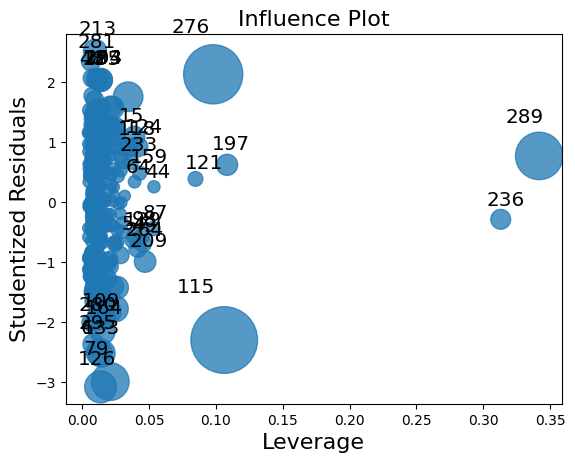

In [ ]:
dfT['roz_2']=dfT['roz']**2
dfT['do']=dfT['dochod']*dfT['oszczednosci']

XT=dfT[['dzieci','roz','roz_2','do']]
XT=sm.add_constant(XT)
yT=dfT['wydatki_zyw']


modelT = sm.OLS(yT, XT).fit()
print(modelT.summary(alpha=0.01))


sm.graphics.influence_plot(modelT, criterion="cooks").show()


Zanim przeanalizuję wyniki, usunę obserwacje wpływające na fit. Wiem, że powinienem się martwić tymi z prawego dołu lub prawej góry wykresu. Są tu obserwacje odstające, ale nie ma takich wpływających na fit. Czyli nic nie usuwam. Na początku popełniłem ten błąd, że usunąłem kilka, stąd zmiana nazwy dataframeu na dfK (końcowe), niczym od dfT się on nie różni

In [ ]:
dfK=dfT


dfK['roz_2']=dfK['roz']**2
dfK['do']=dfK['dochod']*dfK['oszczednosci']

XK=dfK[['dzieci','roz','roz_2']]
XK=sm.add_constant(XK)
yK=dfK['wydatki_zyw']


modelK = sm.OLS(yK, XK).fit()
print(modelK.summary(alpha=0.01))


                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.604e+04
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        21:26:07   Log-Likelihood:                -692.16
No. Observations:                 291   AIC:                             1392.
Df Residuals:                     287   BIC:                             1407.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.005      0.995]
------------------------------------------------------------------------------
const         18.3985      0.646     28.489      0.0

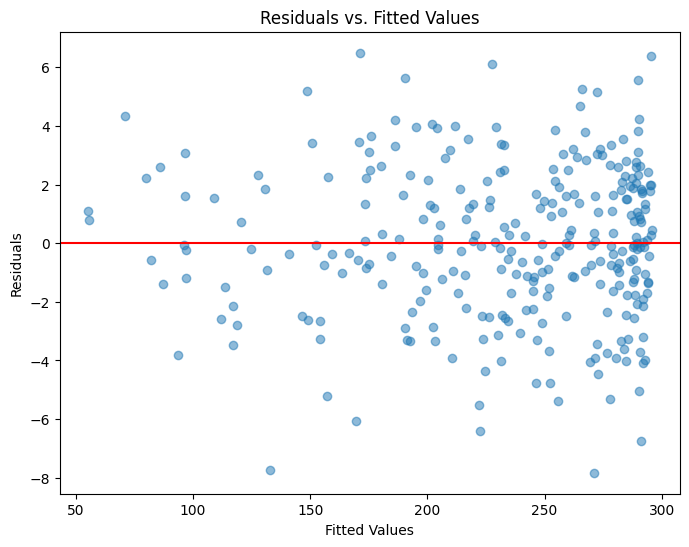

In [ ]:
summary_frameK = modelK.get_prediction().summary_frame()



fityK = modelK.fittedvalues
resK = modelK.resid



resKStand = (resK - resK.mean())/resK.std()
resKSqrt = np.sqrt(np.abs(resKStand))

plt.figure(figsize=(8, 6))
plt.scatter(fityK, resK, alpha=0.5)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()



**Komentarz do wykresu residuals vs fittef values:** Nie widzimy probłemu heteroskedatyczności, ponieważ rozkład residualsów jest podobnie rozproszony na całej długości fitted values - nie ma żadnej struktury jak parabola ostatnio. Nie widać także autokorelacji, bo nie ma żadnego wzoru lub struktury w danych. Jest to to, czego oczekiwaliśmy. Mozna wnioskować, że odpowiednio dobraliśmy formę funkcyjną.

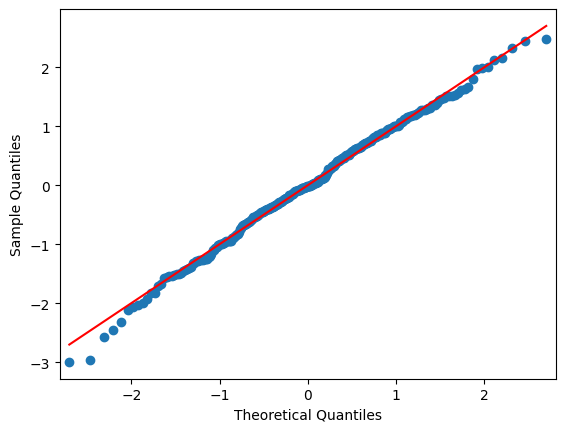

In [ ]:
qqplot_dataK = qqplot(resKStand, line='s').gca().lines


Na tym wykresie sprawdzamy dystrybucję residualsów. Nie ma znaczących różnic między krzywą teoretyczną a punktami, więc wnioskuję, że rozkład reszt jest normalny. Potwierdza to też test Shapiro-Wilka.

In [ ]:
liniaK = px.line(resK)
liniaK.add_hline(y=0)


Nie widzimy zwiększania się amplitudy fluktuacji - mamy homoskedatyczność. Za homoskedatycznością przemawia także to, że nieszczególnie mamy okresy o wysokiej i nieskiej wariancji. Nie widzimy żadnego trendu ani kształtu typu sinus, co oznacza, że nie ma w naszym modelu autokorelacji.

**Ad podpunkt 7:** Mój model ma tylko 3 (oprócz stałej) współczynniki. Każdy z nich jest istotny statystycznie na mocy testu t studenta. Dodatni wspóczynnik przy zmiennej 'dzieci' wskazuje na to, że im więcej Bajt ma Bajtków, tym więcej wydaje na żywność. Każdy wzrost o jedną jednostkę w zmiennej dzieci jest skorelowany ze wzrostem zmiennej 'wydatki_zyw' o około 1.4. Zwróćmy jednak uwagę na to, że model miałby R^2 równe 0.997, gdyby zmienną dzieci wyeliminować. Stąd prawdopodobnie kwestia multikoliniowości, która została wypunktowana przez summary, jednak zgodnie z zaleceniami, nie przejmuję się nią za bardzo. Współczynnik przy 'roz' jest dodatni, natomiast współczynnik przy roz_2 ujemny. Ma to sens w kontekście scatter plotów przedstawionych ad podpunkt 6.

**Ad podpunkt 8:**

In [ ]:
df8=pd.read_csv(file_name, delimiter=';')
df8=df8[df8['wydatki_zyw']>0]

do8=sm.add_constant(dfK[['dzieci','roz','roz_2']])
dfK['predykcje']=modelK.predict(do8)
dfKSorted=dfK.sort_values(by='predykcje', ascending=False)
top10 = int(0.1 * len(dfKSorted))
top10dfK = dfKSorted.head(top10)
top10dfK[['dzieci','roz','dochod','oszczednosci','waga','wzrost','wiek']].describe()




,dzieci,roz,dochod,oszczednosci,waga,wzrost,wiek
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.00000,29.000000
mean,3.034483,763.446207,1539.843448,776.397241,80.191379,173.31069,57.068966
std,1.117483,50.706242,958.917940,951.513708,2.499009,6.75768,5.981704
min,1.000000,660.520000,793.260000,17.620000,74.740000,159.97000,42.000000
25%,2.000000,733.620000,978.080000,184.960000,78.010000,168.51000,54.000000
50%,3.000000,760.910000,1110.820000,383.270000,80.400000,173.29000,57.000000
75%,4.000000,790.030000,1275.330000,531.280000,81.850000,178.11000,60.000000
max,5.000000,861.870000,3893.040000,3086.410000,84.740000,184.69000,74.000000


In [ ]:
dfK[['dzieci','roz','dochod','oszczednosci','waga','wzrost','wiek']].describe()


,dzieci,roz,dochod,oszczednosci,waga,wzrost,wiek
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,1.972509,485.333230,1416.565017,931.231787,79.862096,172.794158,56.116838
std,1.341358,216.029173,662.317282,650.558810,3.327613,6.964248,6.731815
min,0.000000,47.990000,645.270000,5.820000,68.890000,155.670000,37.000000
25%,1.000000,329.885000,978.060000,445.540000,77.440000,167.110000,51.500000
50%,2.000000,470.190000,1206.890000,767.200000,79.900000,172.860000,56.000000
75%,3.000000,644.765000,1618.695000,1266.420000,82.175000,178.125000,61.000000
max,5.000000,1417.950000,4780.150000,3390.590000,86.730000,190.790000,77.000000


**Zmienne jakościowe w kontekście top 10 procent:** O zmiennych, które 'brały czynny udział' w konstruowaniu modelu możemy powiedzieć, że przeciętna osoba ma troje dzieci (mediana 3, "średnia 3.1"). Żadna z osób nie więcej mniej niż jednego dziecka, natomiast zdarzają się takie, które mają 5. Ta grupa charakteryzuje się średnim dochodem na poziomie podobnym do populacji (tylko o 5 procent wyższym). Ich oszczędności są dosyć niskie, co przekłada się na dosyć dużą różnicę roz, o połowę większą niż średnia. O zmiannych, które nie brały udziału bezpośredniego w modelowaniu statystycznym możemy powiedzieć, że nie są one szczególnie różne od tych średnich dla badanej grupy

Zmienne jakościowe w grupie top10 zaprezentuję na Pie-Chartach:

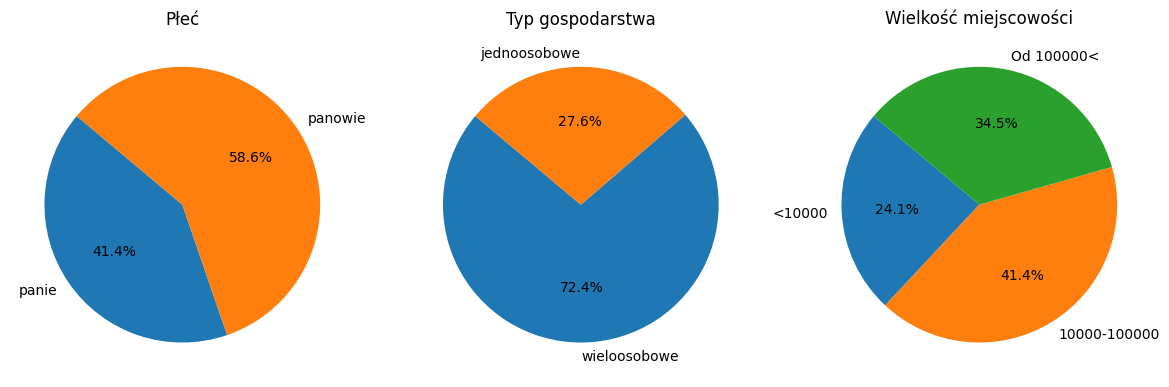

In [ ]:
top10jako=top10dfK[['plec','jednoos','miejsce']]
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

panowie10=top10jako[top10jako["plec"]==2]
panie10=top10jako[top10jako["plec"]==1]
paniPan10=[panie10.count()[0],panowie10.count()[0]]
podpisyPaniPan=["panie","panowie"]

wieloos10=top10jako[top10jako["jednoos"]==0]
jednoos10=top10jako[top10jako["jednoos"]==1]
os10=[wieloos10.count()[0],jednoos10.count()[0]]
podpisyOs=["wieloosobowe","jednoosobowe"]

do1010=top10jako[top10jako["miejsce"]==1]
do10010=top10jako[top10jako["miejsce"]==2]
od10010=top10jako[top10jako["miejsce"]==3]
msce10=[do1010.count()[0],do10010.count()[0],od10010.count()[0]]
podpisyMsce=["<10000","10000-100000","Od 100000<"]



axs[0].pie(paniPan10, labels=podpisyPaniPan, autopct='%1.1f%%', startangle=140, shadow=False)
axs[0].set_title('Płeć')

axs[1].pie(os10, labels=podpisyOs, autopct='%1.1f%%', startangle=140, shadow=False)
axs[1].set_title('Typ gospodarstwa')

axs[2].pie(msce10, labels=podpisyMsce, autopct='%1.1f%%', startangle=140, shadow=False)
axs[2].set_title('Wielkość miejscowości')

plt.tight_layout()
plt.show()


Płeć rozłożona jest dokładnie po równo, podczas gdy poprzednio Panowie stanowili 46.6 procent grupy. Rozkład wielkości miejscowości wypadł bardzo porównywalnie do całej badanej grupy. Jedyne, co wydaje się być ciekawe to to, że o 4 punkty procentowe mniej jest osób z namniejszych miejscowości. Najbardziej wyróżniająca się, w porównaniu do początkowo przeprowadzonego badania, jest zmiana w kontekście typu gospodarstwa. Niemal 77 procent osób z top10 modelu stanowią Bajtki z gospodarstw wieloosowobych (cała badana grupa miała 58 procent Bajtów z gospodarstw wieloosowobych).  

**Dobrze się bawiłem na tym projekcie:)**